
<a><img src = "http://www.savvyandcompany.com/wp-content/uploads/2016/08/Charlotte-Neighborhoods-Elizabeth3.jpg" height="10" width="1100", align = "center"></a>

# Battle of the Neighborhoods - Wake County vs Mecklenburg County Neighborhoods, North Carolina.

# Introduction

When someone or a family is trying to find the best places to live, it's always a good idea to compare cities and if possible, to compare neighborhoods to see if it suites your taste. After all, when you go to buy a car or a house or any big ticket item, you usually try out a few models or visit a few homes before you decide. The same tactic applies to finding the best places to live. It is always advisable to do it before you start planning your move or to help narrow down your choices.

When thinking about the best place to live, lots of things are considered when trying to make a comparison between cities, towns, or neighborhoods. Some of theses includes:

- **Overall Comparison:** This is a comparison of the same factors for each city, resulting in having a general overview of the two cities. Some of the popular factors include population, cost of living, average rent, crime rate, tax rates, and air quality.

- **Crime Rates:** Here, the comparison is made to know the crime rates of two cities, then measures them both against the national statistics.

- **Cost of Living and Salary Comparison:** This takes into account comparing salaries and cost of living within cities for a decision to be made. Some factors for this comparison includes statistics on food, housing, utilities, transportation and more. This is a useful way to find out if your salary will measure up in the new city.

- **Compare Schools:**  This is helpful in finding the best school in a vicinity by doing a comparison between different places. It mostly takes into consideration  test scores and teacher and student ratios, including the teacher's experience of the lists schools in the city of your choice. 

- **Neighborhood Comparison:** This looks at neighborhood comparison and helps one choose the best place to live within any given city. These sites allow you to see some pretty interesting facts about the various communities.



# Problem and Purpose of this Project
The data set includes the coordinates of the cities/neighborhoods in the USA. However, it does not include the venues within these locations. 
If we had the venue information, we could easily find out more information about the neighborhoods. For example, how many restaurants are there, are there parks or cinemas? What about banks and glossary stores? If all these information are known, we could better understand or make educated decision about where to move or relocate to.

Hence, the purpose of this project is to, algorithmically, find a way to use the location coordinates and tag each data point into a neighborhood in two Counties in North Carolina-**Wake County** and **Mecklenburg County**. The algorithm used is **k-means clustering**. The main idea is to determine neighborhood with venues clustered around each other so that one can make a decision on the right neighborhood to chose based on the proximity of amenities and venues to each other.

**NOTE:** While all of these analyses are useful for comparing the neighborhoods, there is nothing like visiting the actual city, seeing the neighborhoods, and speaking with residents. If it's possible, an in-person visit is highly recommended before making a big move or relocating decision.

# k-means Clustering
The k-means clustering algorithm is an unsupervised clustering technique searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster. 
- Each point is closer to its own cluster center than to other cluster centers in the dataset.

The two assumptions above are presumably the basis of the k-means model. 

# Background of the data
The dataset for this project consists of information regarding the cities in the USA obtained from https://simplemaps.com/data/us-cities. Specifically, the data contain: City Name, County Code, County Name, Density, Id, Latitude, Longitude, Source, State Id, State Name, and Timezone. Though this data came with the coordinates, i was not sure how good  it is so the coordinates were removed living the city, county, state names etc. Tableau was used for geocoding the data to obtain the correct coordinates. The data was then exported and converted into a .json, read into a pandas dataframe and sliced into Wake and Meclenburg data for use in the project. Besides this data, the **Foursquare API** was be used to collect venues near the neighborhoods for cluster analysis to be performed on the data.

# Methodology


### To begin with this project, we first import some needed libraries.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!pip install selenium

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


### The data to be used is a json file uploaded unto my data in the cognitive lab.
We begin by reading the json data from the source and loading it into a pandas dataframe.

In [2]:
json_data = 'C:/Users/Nancy/Documents/IBM Data Science/Coursera Capstone Project/NC_Neighborhood/some_us_cities-coordinates.json'
json_data

'C:/Users/Nancy/Documents/IBM Data Science/Coursera Capstone Project/NC_Neighborhood/some_us_cities-coordinates.json'

In [3]:
df = pd.read_json(json_data, orient='columns')

In [4]:
df.head(10)

,City Name,County Code,County Name,Density,Id,Latitude,Longitude,Source,State Id,State Name,Timezone
0,Prairie Ridge,53053,Pierce,1349.8,1840037882,47.1443,-122.1408,polygon,WA,Washington,America/Los_Angeles
1,Edison,53057,Skagit,127.4,1840017314,48.5602,-122.4311,polygon,WA,Washington,America/Los_Angeles
2,Packwood,53041,Lewis,213.9,1840025265,46.6085,-121.6702,polygon,WA,Washington,America/Los_Angeles
3,Wautauga Beach,53035,Kitsap,261.7,1840037725,47.5862,-122.5482,point,WA,Washington,America/Los_Angeles
4,Harper,53035,Kitsap,342.1,1840037659,47.5207,-122.5196,point,WA,Washington,America/Los_Angeles
5,Telma,53007,Chelan,1.4,1840037825,47.8432,-120.8157,point,WA,Washington,America/Los_Angeles
6,Kahlotus,53021,Franklin,156.0,1840018478,46.6436,-118.5566,polygon,WA,Washington,America/Los_Angeles
7,Mondovi,53043,Lincoln,9.4,1840037576,47.6813,-118.0164,point,WA,Washington,America/Los_Angeles
8,Washtucna,53001,Adams,108.0,1840022312,46.7539,-118.3104,polygon,WA,Washington,America/Los_Angeles
9,Pleasant Hill,53033,King,25.8,1840037805,47.6154,-121.9096,point,WA,Washington,America/Los_Angeles


In [5]:
df.shape
print('The dataframe has', df.shape, 'rows and columns respectively.')

The dataframe has (36651, 11) rows and columns respectively.


### Segmenting North Carolina Information

Since the dataframe contains information of the whole of the United States, North Carolina (NC), the State of interest was segmented from the whole and some of the column names renamed.

In [6]:
df.rename(columns={'State Id': 'State', 'County Name':'County', 'County Code':'CountyCode', 'City Name':'Neighborhood'}, inplace=True)
df.head()

,Neighborhood,CountyCode,County,Density,Id,Latitude,Longitude,Source,State,State Name,Timezone
0,Prairie Ridge,53053,Pierce,1349.8,1840037882,47.1443,-122.1408,polygon,WA,Washington,America/Los_Angeles
1,Edison,53057,Skagit,127.4,1840017314,48.5602,-122.4311,polygon,WA,Washington,America/Los_Angeles
2,Packwood,53041,Lewis,213.9,1840025265,46.6085,-121.6702,polygon,WA,Washington,America/Los_Angeles
3,Wautauga Beach,53035,Kitsap,261.7,1840037725,47.5862,-122.5482,point,WA,Washington,America/Los_Angeles
4,Harper,53035,Kitsap,342.1,1840037659,47.5207,-122.5196,point,WA,Washington,America/Los_Angeles


In [7]:
NC_data = df[df.State == 'NC']
NC_data.head()

,Neighborhood,CountyCode,County,Density,Id,Latitude,Longitude,Source,State,State Name,Timezone
7096,Bellemont,37001,Alamance,94.9,1840032927,36.0257,-79.4431,point,NC,North Carolina,America/New_York
7097,Roaring Gap,37005,Alleghany,29.6,1840032976,36.4029,-80.9854,point,NC,North Carolina,America/New_York
7098,South Wadesboro,37007,Anson,232.2,1840032888,34.9563,-80.0773,point,NC,North Carolina,America/New_York
7099,Warrensville,37009,Ashe,56.0,1840032993,36.4607,-81.5190,point,NC,North Carolina,America/New_York
7100,Glendale Springs,37009,Ashe,59.1,1840032951,36.3451,-81.3804,point,NC,North Carolina,America/New_York


### Now the NC data is sliced and the based on the needed columns for the project

In [8]:
cols = [0,2,3,5,6,8]
NC_data = NC_data[NC_data.columns[cols]]
NC_data.head().reset_index()

,index,Neighborhood,County,Density,Latitude,Longitude,State
0,7096,Bellemont,Alamance,94.9,36.0257,-79.4431,NC
1,7097,Roaring Gap,Alleghany,29.6,36.4029,-80.9854,NC
2,7098,South Wadesboro,Anson,232.2,34.9563,-80.0773,NC
3,7099,Warrensville,Ashe,56.0,36.4607,-81.5190,NC
4,7100,Glendale Springs,Ashe,59.1,36.3451,-81.3804,NC


In [9]:
NC_data.shape
print('The dataframe has', NC_data.shape, 'rows and columns respectively.')

The dataframe has (872, 6) rows and columns respectively.


### Let's determine the address of one location in North Carolina, USA.

In [10]:
address = '1400 Spring Garden Street, Greensboro, NC 27412'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of 1400 Spring Garden Street, Greensboro, NC 27412 is {}, {}.'.format(latitude, longitude))

C:\Users\Nancy\AnacondaNew\lib\site-packages\geopy\geocoders\osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinate of 1400 Spring Garden Street, Greensboro, NC 27412 is 36.065422, -79.812834.


## Let's install and import FOLIUM for our purpose
It is a great visualization library. 


In [11]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library
print('Libraries imported.')

Libraries imported.


In [12]:
# create map of New York using latitude and longitude values
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, city, county in zip(NC_data['Latitude'], NC_data['Longitude'], NC_data['Neighborhood'], NC_data['County']):
    label = '{}, {}'.format(county, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='brown',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        ).add_to(map) 
map

In [13]:
#map.save('screenAreGrab.png',format='png')
map.save('map.html')

In [14]:
#from folium.plugins import MarkerCluster
#some_map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=4)
#mc = MarkerCluster()
#creating a Marker for each point in df_sample. Each point will get a popup with their zip
#for row in df.itertuples():
#    mc.add_child(folium.Marker(location=[row.Latitude,  row.Longitude],
#                 popup=row.Neighborhood))
 
#some_map.add_child(mc)
#some_map**

In [15]:
#from folium.features import CustomIcon
#from folium.plugins import MarkerCluster

#map3 = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=4)
#mc = MarkerCluster()
#marker_cluster = folium.MarkerCluster().add_to(map3)
#for point in range(0, len(locationlist)):
#    folium.Marker(locationlist[point], popup='ID:'+df['CountyCode'][point]+' '+df['Neighborhood'][point], icon=folium.Icon(color=df_counters["color"][point], icon_color='white', icon='male', angle=0, prefix='fa')).add_to(marker_cluster)
#map3

## Segmenting Wake County
Let's simplify the above map and segment and clusters only the neighborhoods in Wake County. So let's slice the original dataframe and create a new dataframe of the Wake County data.

In [16]:
wake_data = NC_data[NC_data.County == 'Wake']
wake_data.drop(wake_data.index[2], inplace=True)
print('The dataframe has', wake_data.shape, 'rows and columns respectively.')
wake_data.reset_index()

The dataframe has (12, 6) rows and columns respectively.


C:\Users\Nancy\AnacondaNew\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,index,Neighborhood,County,Density,Latitude,Longitude,State
0,7225,Neuse,Wake,1314.1,35.8974,-78.5692,NC
1,32748,Zebulon,Wake,472.0,35.8311,-78.3185,NC
2,32750,Rolesville,Wake,662.0,35.9249,-78.4654,NC
3,32751,Knightdale,Wake,893.0,35.7921,-78.4968,NC
4,32752,Morrisville,Wake,1135.0,35.8359,-78.8349,NC
5,32753,Fuquay-Varina,Wake,772.0,35.5956,-78.7801,NC
6,32754,Garner,Wake,737.0,35.6949,-78.6212,NC
7,32755,Holly Springs,Wake,825.0,35.6544,-78.8392,NC
8,32756,Wake Forest,Wake,971.0,35.9630,-78.5144,NC
9,32757,Apex,Wake,1057.0,35.7248,-78.8660,NC


### Now let's get the latitude and longitude values of Wake County, NC

In [17]:
address = 'Wake, NC'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Wake, NC are {}, {}.'.format(latitude, longitude))

C:\Users\Nancy\AnacondaNew\lib\site-packages\geopy\geocoders\osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinate of Wake, NC are 35.7979355, -78.6118311.


# Visualizing Wake County Sliced Data

In [18]:
map_wake = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(wake_data['Latitude'], wake_data['Longitude'], wake_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color='brown',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_wake)  
    
map_wake


In [19]:
#fig.savefig('map_wake')

##  Wake County Neighborhood Cluster
Now, the next thing to do is to utilize the Foursquare API to explore the wake county neighborhoods and segment them.
#### Let's define Foursquare Credentials and Version

In [20]:
CLIENT_ID = 'your Foursquare ID' # your Foursquare ID
CLIENT_SECRET = 'your Foursquare Secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: N22LHDJFUHD0QBIJI4G50TTBKST3KXWIQ5WREP4KOOI0YSOL
CLIENT_SECRET:WURHMWC4TNFRDD1TDWPDZMFQ2DXYZRK0AYYPCD0EUSSQXA0H


#### Let's explore the first  neighborhood in the Wake County dataframe.

In [21]:
wake_data.loc[7225,'Neighborhood']
print('The first neighborhood is', wake_data.loc[7225,'Neighborhood'])

The first neighborhood is Neuse


### Now we get the first neighborhood's latitude and longitude values.


In [22]:
neighborhood_latitude = wake_data.loc[7225, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = wake_data.loc[7225, 'Longitude'] # neighborhood longitude value

neighborhood_name = wake_data.loc[7225, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude)) 

Latitude and longitude values of Neuse are 35.8974, -78.5692.


#### Now, let's get the top 100 venues that are in Marble Hill within a radius of 500 meters.
First, let's create the GET request URL. Name your URL **url**.

In [23]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=N22LHDJFUHD0QBIJI4G50TTBKST3KXWIQ5WREP4KOOI0YSOL&client_secret=WURHMWC4TNFRDD1TDWPDZMFQ2DXYZRK0AYYPCD0EUSSQXA0H&v=20180605&ll=35.8974,-78.5692&radius=500&limit=100'

### The GET request is then sent and and the results examined

In [24]:
results = requests.get(url).json()
#results

Before we proceed, let's use the **get_category_type** function to get the category types.

In [25]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Now json is cleaned and the and structured into a *pandas* dataframe.

In [26]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Cafe Capistrano,Mexican Restaurant,35.896604,-78.568643
1,Vintage Village Farmers Market,Farmers Market,35.897566,-78.569430
2,GrillBillies BBQ,BBQ Joint,35.897996,-78.569591
3,Dance Attitude,Dance Studio,35.896596,-78.568433
4,SuzAnna's Antiques,Antique Shop,35.897653,-78.569477


In [27]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

8 venues were returned by Foursquare.


### Wake County Neighborhood Exploration
Let's create a function to collect the venues to all the neighborhoods in Wake County

In [28]:

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now let's write the code to run the above function on each neighborhood and create a new dataframe called *Wake County_venues*.

In [29]:
# type your answer here
wake_venues = getNearbyVenues(names=wake_data['Neighborhood'],
                                   latitudes=wake_data['Latitude'],
                                   longitudes=wake_data['Longitude']
                                  )

Neuse
Zebulon
Rolesville
Knightdale
Morrisville
Fuquay-Varina
Garner
Holly Springs
Wake Forest
Apex
Cary
Raleigh


In [30]:
print('There are', wake_venues.shape, 'rows and columns of venues and neighborhoods in Wake County.')
wake_venues.head(10)

There are (106, 7) rows and columns of venues and neighborhoods in Wake County.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Neuse,35.8974,-78.5692,Cafe Capistrano,35.896604,-78.568643,Mexican Restaurant
1,Neuse,35.8974,-78.5692,Vintage Village Farmers Market,35.897566,-78.569430,Farmers Market
2,Neuse,35.8974,-78.5692,GrillBillies BBQ,35.897996,-78.569591,BBQ Joint
3,Neuse,35.8974,-78.5692,Dance Attitude,35.896596,-78.568433,Dance Studio
4,Neuse,35.8974,-78.5692,SuzAnna's Antiques,35.897653,-78.569477,Antique Shop
5,Neuse,35.8974,-78.5692,Soccer Genome,35.895636,-78.566749,Athletics & Sports
6,Neuse,35.8974,-78.5692,Teamworks Dog Training,35.894629,-78.569596,Dog Run
7,Neuse,35.8974,-78.5692,Woofinwaggle,35.894456,-78.568632,Pet Service
8,Zebulon,35.8311,-78.3185,Smithfield's Chicken 'N Bar-B-Q,35.833454,-78.318765,BBQ Joint
9,Zebulon,35.8311,-78.3185,Food Lion Grocery Store,35.832507,-78.318439,Supermarket


Text(0,0.5,'Venue Count')

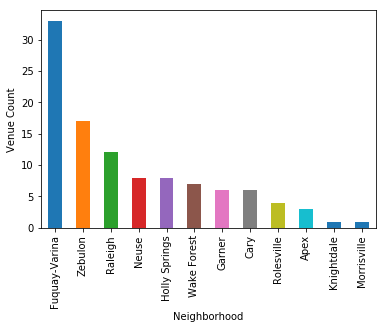

In [80]:
plot1=wake_venues["Neighborhood"].value_counts().plot(kind = "bar")
plot1.set_xlabel('Neighborhood')
plot1.set_ylabel('Venue Count')

Let's check how many venues were returned for each neighborhood

In [32]:
venue_counts = wake_venues.groupby('Neighborhood').count()
venue_counts

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Apex,3,3,3,3,3,3
Cary,6,6,6,6,6,6
Fuquay-Varina,33,33,33,33,33,33
Garner,6,6,6,6,6,6
Holly Springs,8,8,8,8,8,8
Knightdale,1,1,1,1,1,1
Morrisville,1,1,1,1,1,1
Neuse,8,8,8,8,8,8
Raleigh,12,12,12,12,12,12


#### Let's find out how many unique categories can be curated from all the returned venues

In [33]:
print('There are {} uniques categories.'.format(len(wake_venues['Venue Category'].unique())))

There are 62 uniques categories.


## Let's Analyze Each Neighborhood in Wake County. NC.

In [34]:
# one hot encoding
wake_onehot = pd.get_dummies(wake_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
wake_onehot['Neighborhood'] = wake_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [wake_onehot.columns[-1]] + list(wake_onehot.columns[:-1])
wake_onehot = wake_onehot[fixed_columns]

wake_onehot.head()

,Neighborhood,American Restaurant,Antique Shop,Asian Restaurant,Athletics & Sports,BBQ Joint,Baseball Field,Basketball Court,Big Box Store,Boutique,Breakfast Spot,Brewery,Bus Station,Chinese Restaurant,Coffee Shop,Comic Shop,Cosmetics Shop,Dance Studio,Department Store,Discount Store,Dog Run,Donut Shop,Farm,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Furniture / Home Store,Gas Station,Gift Shop,Gym,Gym Pool,Health & Beauty Service,Hobby Shop,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Mexican Restaurant,Mobile Phone Shop,Optical Shop,Other Repair Shop,Paper / Office Supplies Store,Park,Pet Service,Pet Store,Pharmacy,Pizza Place,Playground,Restaurant,Salon / Barbershop,Sandwich Place,Shipping Store,Shoe Store,Smoothie Shop,Spa,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Video Store,Yoga Studio
0,Neuse,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Neuse,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Neuse,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Neuse,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Neuse,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [35]:
wake_onehot.shape
print('The dataframe has', wake_onehot.shape, 'rows and columns respectively.')

The dataframe has (106, 63) rows and columns respectively.


#### Next, let's group rows by neighborhood by taking the mean of the frequency of occurrence of each category

In [36]:
wake_grouped = wake_onehot.groupby('Neighborhood').mean().reset_index()
wake_grouped

,Neighborhood,American Restaurant,Antique Shop,Asian Restaurant,Athletics & Sports,BBQ Joint,Baseball Field,Basketball Court,Big Box Store,Boutique,Breakfast Spot,Brewery,Bus Station,Chinese Restaurant,Coffee Shop,Comic Shop,Cosmetics Shop,Dance Studio,Department Store,Discount Store,Dog Run,Donut Shop,Farm,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Furniture / Home Store,Gas Station,Gift Shop,Gym,Gym Pool,Health & Beauty Service,Hobby Shop,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Mexican Restaurant,Mobile Phone Shop,Optical Shop,Other Repair Shop,Paper / Office Supplies Store,Park,Pet Service,Pet Store,Pharmacy,Pizza Place,Playground,Restaurant,Salon / Barbershop,Sandwich Place,Shipping Store,Shoe Store,Smoothie Shop,Spa,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Video Store,Yoga Studio
0,Apex,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.333333,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.333333,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.333333,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Cary,0.000000,0.000,0.000000,0.000,0.000000,0.166667,0.0,0.000000,0.000000,0.166667,0.000,0.166667,0.166667,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Fuquay-Varina,0.090909,0.000,0.030303,0.000,0.000000,0.000000,0.0,0.000000,0.030303,0.030303,0.000,0.000000,0.030303,0.000000,0.030303,0.060606,0.000000,0.000000,0.030303,0.000,0.030303,0.000000,0.000,0.030303,0.030303,0.000000,0.030303,0.030303,0.030303,0.00,0.000000,0.000000,0.000000,0.000,0.030303,0.000000,0.090909,0.030303,0.000000,0.000000,0.030303,0.000000,0.000,0.060606,0.000000,0.030303,0.000000,0.000,0.030303,0.060606,0.030303,0.030303,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000,0.030303,0.000000
3,Garner,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667
4,Holly Springs,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.00,0.000000,0.000000,0.000000,0.125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.250000,0.250000,0.000000,0.125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Knightdale,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0

#### Let's print each neighborhood along with the top 5 most common venues

In [37]:
num_top_venues = 5

for hood in wake_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = wake_grouped[wake_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Apex----
                     venue  freq
0               Playground  0.33
1  Health & Beauty Service  0.33
2                     Farm  0.33
3                    Hotel  0.00
4        Indian Restaurant  0.00


----Cary----
            venue  freq
0  Breakfast Spot  0.17
1     Bus Station  0.17
2    Dance Studio  0.17
3  Baseball Field  0.17
4             Gym  0.17


----Fuquay-Varina----
                 venue  freq
0  American Restaurant  0.09
1   Mexican Restaurant  0.09
2       Cosmetics Shop  0.06
3            Pet Store  0.06
4       Sandwich Place  0.06


----Garner----
            venue  freq
0            Park  0.33
1     Yoga Studio  0.17
2  Cosmetics Shop  0.17
3     Coffee Shop  0.17
4      Sports Bar  0.17


----Holly Springs----
         venue  freq
0     Pharmacy  0.25
1  Pizza Place  0.25
2   Restaurant  0.12
3      Brewery  0.12
4          Gym  0.12


----Knightdale----
                 venue  freq
0                 Park   1.0
1  American Restaurant   0.0
2           P

#### Let's put that into a *pandas* dataframe
First, let's write a function to sort the venues in descending order.

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [39]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = wake_grouped['Neighborhood']

for ind in np.arange(wake_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(wake_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Apex,Health & Beauty Service,Farm,Playground,Asian Restaurant,Athletics & Sports,Gift Shop,Gas Station,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant
1,Cary,Dance Studio,Breakfast Spot,Gym,Baseball Field,Chinese Restaurant,Bus Station,Discount Store,Dog Run,Donut Shop,Farm
2,Fuquay-Varina,American Restaurant,Mexican Restaurant,Sandwich Place,Cosmetics Shop,Pet Store,Indian Restaurant,Paper / Office Supplies Store,Comic Shop,Mobile Phone Shop,Discount Store
3,Garner,Park,Yoga Studio,Coffee Shop,Sports Bar,Cosmetics Shop,Donut Shop,Department Store,Discount Store,Dog Run,Farmers Market
4,Holly Springs,Pizza Place,Pharmacy,Ice Cream Shop,Brewery,Restaurant,Gym,Gas Station,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant
5,Knightdale,Park,Yoga Studio,Cosmetics Shop,Gift Shop,Gas Station,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Farm
6,Morrisville,Basketball Court,Yoga Studio,Cosmetics Shop,Gym,Gift Shop,Gas Station,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Farmers Market
7,Neuse,Dance Studio,Farmers Market,Antique Shop,Pet Service,Athletics & Sports,BBQ Joint,Dog Run,Mexican Restaurant,Discount Store,Donut Shop
8,Raleigh,American Restaurant,Spa,Gym,Hotel,Italian Restaurant,Coffee Shop,Big Box Store,Smoothie Shop,Pharmacy,Furniture / Home Store
9,Rolesville,Pizza Place,Sandwich Place,Restaurant,Gym Pool,Athletics & Sports,Cosmetics Shop,Gift Shop,Gas Station,Furniture / Home Store,Food & Drink Shop


In [40]:
neighborhoods_venues_sorted.shape
print('The dataframe has', neighborhoods_venues_sorted.shape, 'rows and columns respectively.')

The dataframe has (12, 11) rows and columns respectively.


## Let's  Cluster the Neighborhoods in Wake County.
#### Run k-means to cluster the neighborhood into **4 clusters**.


In [41]:
# set number of clusters
kclusters = 4

wake_grouped_clustering = wake_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(wake_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 1, 1, 1, 1, 0, 2, 1, 1, 1])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [42]:
wake_merged = wake_data

# add clustering labels
wake_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
wake_merged = wake_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

wake_merged

C:\Users\Nancy\AnacondaNew\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Neighborhood,County,Density,Latitude,Longitude,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7225,Neuse,Wake,1314.1,35.8974,-78.5692,NC,3,Dance Studio,Farmers Market,Antique Shop,Pet Service,Athletics & Sports,BBQ Joint,Dog Run,Mexican Restaurant,Discount Store,Donut Shop
32748,Zebulon,Wake,472.0,35.8311,-78.3185,NC,1,Fast Food Restaurant,Pizza Place,Video Store,Department Store,Pharmacy,Sandwich Place,Supermarket,Steakhouse,BBQ Joint,Optical Shop
32750,Rolesville,Wake,662.0,35.9249,-78.4654,NC,1,Pizza Place,Sandwich Place,Restaurant,Gym Pool,Athletics & Sports,Cosmetics Shop,Gift Shop,Gas Station,Furniture / Home Store,Food & Drink Shop
32751,Knightdale,Wake,893.0,35.7921,-78.4968,NC,1,Park,Yoga Studio,Cosmetics Shop,Gift Shop,Gas Station,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Farm
32752,Morrisville,Wake,1135.0,35.8359,-78.8349,NC,1,Basketball Court,Yoga Studio,Cosmetics Shop,Gym,Gift Shop,Gas Station,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Farmers Market
32753,Fuquay-Varina,Wake,772.0,35.5956,-78.7801,NC,0,American Restaurant,Mexican Restaurant,Sandwich Place,Cosmetics Shop,Pet Store,Indian Restaurant,Paper / Office Supplies Store,Comic Shop,Mobile Phone Shop,Discount Store
32754,Garner,Wake,737.0,35.6949,-78.6212,NC,2,Park,Yoga Studio,Coffee Shop,Sports Bar,Cosmetics Shop,Donut Shop,Department Store,Discount Store,Dog Run,Farmers Market
32755,Holly Springs,Wake,825.0,35.6544,-78.8392,NC,1,Pizza Place,Pharmacy,Ice Cream Shop,Brewery,Restaurant,Gym,Gas Station,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant
32756,Wake Forest,Wake,971.0,35.9630,-78.5144,NC,1,Gas Station,Supermarket,Other Repair Shop,Breakfast Spot,Italian Restaurant,Pharmacy,Hobby Shop,Fast Food Restaurant,Farmers Market,Food & Drink Shop
32757,Apex,Wake,1057.0,35.7248,-78.8660,NC,1,Health & Beauty Service,Farm,Playground,Asian Restaurant,Athletics & Sports,Gift Shop,Gas Station,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant


### Finally, let's visualize the resulting clusters

In [43]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(wake_merged['Latitude'], wake_merged['Longitude'], wake_merged['Neighborhood'], wake_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
from folium.plugins import FloatImage
image_file = 'http://printad.us/wp-content/uploads/2018/07/wake-county-zip-code-map-maps-wake-county-north-carolina-map-a-history-of-zip-code-wake-for-557-x-575-pixels.jpg'

FloatImage(image_file, bottom=0, left=70).add_to(map_clusters)
map_clusters

<Figure size 720x720 with 0 Axes>

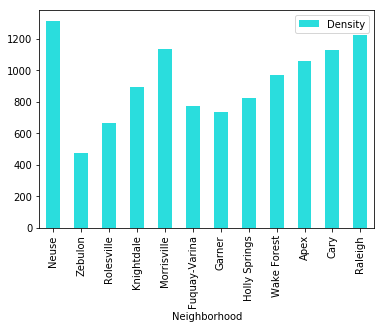

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
#wake_merged.hist(column='Density')
wake_merged.plot(kind='bar',x='Neighborhood',y='Density', color=rainbow[cluster])
plt.show()

# Let's Examine The Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

#### Cluster 1 - American Restaurant

In [45]:
wake_merged.loc[wake_merged['Cluster Labels'] == 0, wake_merged.columns[[1] + list(range(5, wake_merged.shape[1]))]]

,County,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32753,Wake,NC,0,American Restaurant,Mexican Restaurant,Sandwich Place,Cosmetics Shop,Pet Store,Indian Restaurant,Paper / Office Supplies Store,Comic Shop,Mobile Phone Shop,Discount Store


#### Cluster 2 - Restaurants

In [46]:
wake_merged.loc[wake_merged['Cluster Labels'] == 1, wake_merged.columns[[1] + list(range(5, wake_merged.shape[1]))]]

,County,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32748,Wake,NC,1,Fast Food Restaurant,Pizza Place,Video Store,Department Store,Pharmacy,Sandwich Place,Supermarket,Steakhouse,BBQ Joint,Optical Shop
32750,Wake,NC,1,Pizza Place,Sandwich Place,Restaurant,Gym Pool,Athletics & Sports,Cosmetics Shop,Gift Shop,Gas Station,Furniture / Home Store,Food & Drink Shop
32751,Wake,NC,1,Park,Yoga Studio,Cosmetics Shop,Gift Shop,Gas Station,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Farmers Market,Farm
32752,Wake,NC,1,Basketball Court,Yoga Studio,Cosmetics Shop,Gym,Gift Shop,Gas Station,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant,Farmers Market
32755,Wake,NC,1,Pizza Place,Pharmacy,Ice Cream Shop,Brewery,Restaurant,Gym,Gas Station,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant
32756,Wake,NC,1,Gas Station,Supermarket,Other Repair Shop,Breakfast Spot,Italian Restaurant,Pharmacy,Hobby Shop,Fast Food Restaurant,Farmers Market,Food & Drink Shop
32757,Wake,NC,1,Health & Beauty Service,Farm,Playground,Asian Restaurant,Athletics & Sports,Gift Shop,Gas Station,Furniture / Home Store,Food & Drink Shop,Fast Food Restaurant
32758,Wake,NC,1,Dance Studio,Breakfast Spot,Gym,Baseball Field,Chinese Restaurant,Bus Station,Discount Store,Dog Run,Donut Shop,Farm
32759,Wake,NC,1,American Restaurant,Spa,Gym,Hotel,Italian Restaurant,Coffee Shop,Big Box Store,Smoothie Shop,Pharmacy,Furniture / Home Store


#### Cluster 3 - Park

In [47]:
wake_merged.loc[wake_merged['Cluster Labels'] == 2, wake_merged.columns[[1] + list(range(5, wake_merged.shape[1]))]]

,County,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32754,Wake,NC,2,Park,Yoga Studio,Coffee Shop,Sports Bar,Cosmetics Shop,Donut Shop,Department Store,Discount Store,Dog Run,Farmers Market


#### Cluster 4 - Dance Studio

In [48]:
wake_merged.loc[wake_merged['Cluster Labels'] == 3, wake_merged.columns[[1] + list(range(5, wake_merged.shape[1]))]]

,County,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7225,Wake,NC,3,Dance Studio,Farmers Market,Antique Shop,Pet Service,Athletics & Sports,BBQ Joint,Dog Run,Mexican Restaurant,Discount Store,Donut Shop


# Segmenting Mecklenburg County, NC.

Let's simplify the above map and segment and cluster only the neighborhoods in Mecklenburg County. So let's slice the original dataframe and create a new dataframe of the Mecklenburg County data.

In [49]:
mecklenburg_data = NC_data[NC_data.County == 'Mecklenburg']
#mecklenburg_data.drop(mecklenburg_data.index[2], inplace=True)
print('The dataframe has', mecklenburg_data.shape, 'rows and columns respectively.')
mecklenburg_data.reset_index()

The dataframe has (10, 6) rows and columns respectively.


,index,Neighborhood,County,Density,Latitude,Longitude,State
0,7182,Paw Creek,Mecklenburg,533.0,35.2749,-80.9384,NC
1,7183,Hickory Grove,Mecklenburg,992.4,35.2288,-80.7206,NC
2,7184,Derita,Mecklenburg,1123.7,35.2938,-80.7976,NC
3,32556,Pineville,Mecklenburg,500.0,35.0864,-80.8915,NC
4,32557,Davidson,Mecklenburg,835.0,35.4861,-80.8272,NC
5,32558,Mint Hill,Mecklenburg,424.0,35.1781,-80.6538,NC
6,32559,Cornelius,Mecklenburg,951.0,35.4733,-80.8833,NC
7,32560,Matthews,Mecklenburg,710.0,35.1196,-80.7101,NC
8,32561,Huntersville,Mecklenburg,530.0,35.4055,-80.8741,NC
9,32562,Charlotte,Mecklenburg,1065.0,35.2080,-80.8308,NC


In [50]:
address = 'Mecklenburg, NC'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mecklenburg, NC are {}, {}.'.format(latitude, longitude))

C:\Users\Nancy\AnacondaNew\lib\site-packages\geopy\geocoders\osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinate of Mecklenburg, NC are 35.2356385, -80.8139485.


In [51]:
map_mecklenburg = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(mecklenburg_data['Latitude'], mecklenburg_data['Longitude'], mecklenburg_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_mecklenburg)  
    
map_mecklenburg

#### Let's get the first neighborhood in Mecklenburg County

In [52]:
print('The first neighborhood in Mecklenburg County is', mecklenburg_data.loc[7182, 'Neighborhood'])

The first neighborhood in Mecklenburg County is Paw Creek


#### Let's get the first neighborhood coordiates.

In [53]:
neighborhood_latitude = mecklenburg_data.loc[7182, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = mecklenburg_data.loc[7182, 'Longitude'] # neighborhood longitude value

neighborhood_name = mecklenburg_data.loc[7182, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Paw Creek are 35.2749, -80.9384.


## Let's get the first 100 venues

In [54]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=N22LHDJFUHD0QBIJI4G50TTBKST3KXWIQ5WREP4KOOI0YSOL&client_secret=WURHMWC4TNFRDD1TDWPDZMFQ2DXYZRK0AYYPCD0EUSSQXA0H&v=20180605&ll=35.2749,-80.9384&radius=500&limit=100'

### We send the get request to examine the result

In [55]:
results = requests.get(url).json()
#results

Now let's get the categories using the **get_category_type**

In [56]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Let's clean the json data and load into a pandas dataframe

In [57]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Circle K,Gas Station,35.273573,-80.937503
1,Dollar General,Discount Store,35.274704,-80.938302
2,Papa John's Pizza,Pizza Place,35.273106,-80.935907
3,Tank town cafe,Restaurant,35.274119,-80.937511
4,Wok Bo,Chinese Restaurant,35.272641,-80.936404


In [58]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

5 venues were returned by Foursquare.


#### Let's explore nearby venues

In [59]:

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now let's write the code to run the above function on each neighborhood and create a new dataframe called *mecklenburg_venues*.

In [60]:
# type your answer here
mecklenburg_venues = getNearbyVenues(names=mecklenburg_data['Neighborhood'],
                                   latitudes=mecklenburg_data['Latitude'],
                                   longitudes=mecklenburg_data['Longitude']
                                  )

Paw Creek
Hickory Grove
Derita
Pineville
Davidson
Mint Hill
Cornelius
Matthews
Huntersville
Charlotte


In [61]:
print('There are', mecklenburg_venues.shape, 'rows and columns venues and neighborhoods in Mecklenburg County.')
mecklenburg_venues.head(10)

There are (71, 7) rows and columns venues and neighborhoods in Mecklenburg County.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Paw Creek,35.2749,-80.9384,Circle K,35.273573,-80.937503,Gas Station
1,Paw Creek,35.2749,-80.9384,Dollar General,35.274704,-80.938302,Discount Store
2,Paw Creek,35.2749,-80.9384,Papa John's Pizza,35.273106,-80.935907,Pizza Place
3,Paw Creek,35.2749,-80.9384,Tank town cafe,35.274119,-80.937511,Restaurant
4,Paw Creek,35.2749,-80.9384,Wok Bo,35.272641,-80.936404,Chinese Restaurant
5,Hickory Grove,35.2288,-80.7206,Track at Hickory Grove Recreation Center,35.226656,-80.718377,Track
6,Hickory Grove,35.2288,-80.7206,Hickory Grove Recreation Center,35.225885,-80.717877,Basketball Court
7,Derita,35.2938,-80.7976,Chicken King,35.295867,-80.797767,Fried Chicken Joint
8,Derita,35.2938,-80.7976,Walgreens,35.293306,-80.796302,Pharmacy
9,Derita,35.2938,-80.7976,Redbox,35.292780,-80.796850,Video Store


Text(0,0.5,'Venue Count')

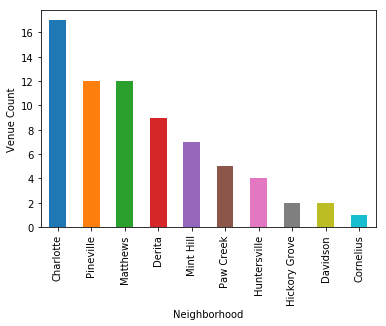

In [62]:
plot1=mecklenburg_venues["Neighborhood"].value_counts().plot(kind = "bar")
plot1.set_xlabel('Neighborhood')
plot1.set_ylabel('Venue Count')

Let's look at the number of venues returned for each neighborhood

In [63]:
mecklenburg_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Charlotte,17,17,17,17,17,17
Cornelius,1,1,1,1,1,1
Davidson,2,2,2,2,2,2
Derita,9,9,9,9,9,9
Hickory Grove,2,2,2,2,2,2
Huntersville,4,4,4,4,4,4
Matthews,12,12,12,12,12,12
Mint Hill,7,7,7,7,7,7
Paw Creek,5,5,5,5,5,5


Let's see the number of unique categories that can be curated from this venues

In [64]:
print('There are {} uniques categories.'.format(len(mecklenburg_venues['Venue Category'].unique())))

There are 52 uniques categories.


## Mecklenburg County Neighborhood Analysis

In [65]:
# one hot encoding
mecklenburg_onehot = pd.get_dummies(mecklenburg_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mecklenburg_onehot['Neighborhood'] = mecklenburg_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [mecklenburg_onehot.columns[-1]] + list(mecklenburg_onehot.columns[:-1])
mecklenburg_onehot = mecklenburg_onehot[fixed_columns]

mecklenburg_onehot.head()

,Neighborhood,American Restaurant,Bakery,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Big Box Store,Breakfast Spot,Brewery,Business Service,Café,Camera Store,Chinese Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Diner,Discount Store,Donut Shop,Dry Cleaner,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gym,Hobby Shop,Ice Cream Shop,Indian Restaurant,Kids Store,Latin American Restaurant,Martial Arts Dojo,Men's Store,Mobile Phone Shop,Pharmacy,Pizza Place,Pool,Pool Hall,Residential Building (Apartment / Condo),Restaurant,Sandwich Place,Scenic Lookout,Shipping Store,Shoe Store,Spa,Sporting Goods Shop,Supermarket,Theme Park Ride / Attraction,Toy / Game Store,Track,Video Store,Women's Store
0,Paw Creek,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Paw Creek,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Paw Creek,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Paw Creek,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Paw Creek,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let's examine the dataframe

In [66]:
mecklenburg_onehot.shape
print('The dataframe has', mecklenburg_onehot.shape, 'rows and columns respectively.')

The dataframe has (71, 53) rows and columns respectively.


### Next, let's group rows by neighborhood by taking the mean of the frequency of occurrence of each category

In [67]:
mecklenburg_grouped = mecklenburg_onehot.groupby('Neighborhood').mean().reset_index()
mecklenburg_grouped

,Neighborhood,American Restaurant,Bakery,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Big Box Store,Breakfast Spot,Brewery,Business Service,Café,Camera Store,Chinese Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Diner,Discount Store,Donut Shop,Dry Cleaner,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gym,Hobby Shop,Ice Cream Shop,Indian Restaurant,Kids Store,Latin American Restaurant,Martial Arts Dojo,Men's Store,Mobile Phone Shop,Pharmacy,Pizza Place,Pool,Pool Hall,Residential Building (Apartment / Condo),Restaurant,Sandwich Place,Scenic Lookout,Shipping Store,Shoe Store,Spa,Sporting Goods Shop,Supermarket,Theme Park Ride / Attraction,Toy / Game Store,Track,Video Store,Women's Store
0,Charlotte,0.000000,0.117647,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.058824,0.058824,0.058824,0.000000,0.000000,0.058824,0.0,0.000000,0.000000,0.0,0.058824,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.058824,0.058824,0.00,0.000000,0.000000,0.058824,0.058824,0.000000,0.058824,0.0,0.000000,0.058824,0.058824,0.000000,0.000000,0.000000,0.000000,0.058824,0.058824,0.000000,0.000000,0.000000,0.0,0.000000,0.058824
1,Cornelius,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,Davidson,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.5,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,Derita,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.111111,0.000000,0.111111,0.000000,0.0,0.000000,0.000000,0.111111,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.0,0.000000,0.000000,0.000000,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.0,0.111111,0.000000
4,Hickory Grove,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000
5,Huntersville,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
6,Matthews,0.083333,0.000000,0.000000,0.083333,0.0,0.000000,0.000000,0.083333,0.083333,0.00,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.083333,0.000000,0.000000,0.0,0.083333,0.000000,0.000000,0.000000,0.00,0.000000,0.083333,0.000000,0.000000,0.083333,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.083333,0.000000,0.0,0.083333,0.000000
7,Mint Hill,0.000000,0.000000,0.142857,0.000000,0.0,0.142857,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,

Let's again print each neighborhood along with the top **5 venues**

In [68]:
num_top_venues = 5

for hood in mecklenburg_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = mecklenburg_grouped[mecklenburg_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Charlotte----
               venue  freq
0             Bakery  0.12
1      Women's Store  0.06
2       Camera Store  0.06
3  Indian Restaurant  0.06
4     Ice Cream Shop  0.06


----Cornelius----
                       venue  freq
0             Ice Cream Shop   1.0
1                     Bakery   0.0
2          Indian Restaurant   0.0
3                 Kids Store   0.0
4  Latin American Restaurant   0.0


----Davidson----
                        venue  freq
0  Construction & Landscaping   0.5
1              Cosmetics Shop   0.5
2         American Restaurant   0.0
3                  Kids Store   0.0
4   Latin American Restaurant   0.0


----Derita----
                 venue  freq
0       Ice Cream Shop  0.11
1          Video Store  0.11
2          Supermarket  0.11
3  Fried Chicken Joint  0.11
4           Donut Shop  0.11


----Hickory Grove----
                 venue  freq
0                Track   0.5
1     Basketball Court   0.5
2  American Restaurant   0.0
3           Restaurant  

### Let's again put this into a pandas dataframe

Let's write a function to sort venues in decending order

In [69]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [70]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mecklenburg_grouped['Neighborhood']

for ind in np.arange(mecklenburg_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mecklenburg_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Charlotte,Bakery,Women's Store,Residential Building (Apartment / Condo),Convenience Store,Ice Cream Shop,Indian Restaurant,Camera Store,Men's Store,Mobile Phone Shop,Café
1,Cornelius,Ice Cream Shop,Women's Store,Gas Station,Fried Chicken Joint,Dry Cleaner,Donut Shop,Discount Store,Diner,Deli / Bodega,Cosmetics Shop
2,Davidson,Cosmetics Shop,Construction & Landscaping,Women's Store,Video Store,Furniture / Home Store,Fried Chicken Joint,Dry Cleaner,Donut Shop,Discount Store,Diner
3,Derita,Pharmacy,Donut Shop,Video Store,Supermarket,Ice Cream Shop,Scenic Lookout,Sandwich Place,Fried Chicken Joint,Chinese Restaurant,Women's Store
4,Hickory Grove,Track,Basketball Court,Women's Store,Camera Store,Fried Chicken Joint,Dry Cleaner,Donut Shop,Discount Store,Diner,Deli / Bodega
5,Huntersville,Pool,Kids Store,Brewery,Women's Store,Chinese Restaurant,Fried Chicken Joint,Dry Cleaner,Donut Shop,Discount Store,Diner
6,Matthews,Gym,Pharmacy,Baseball Field,Big Box Store,Breakfast Spot,Construction & Landscaping,Dry Cleaner,Video Store,Martial Arts Dojo,American Restaurant
7,Mint Hill,Gym,Beer Bar,Restaurant,Sandwich Place,Shipping Store,Pizza Place,Bar,Discount Store,Diner,Camera Store
8,Paw Creek,Chinese Restaurant,Discount Store,Pizza Place,Restaurant,Gas Station,Women's Store,Fried Chicken Joint,Dry Cleaner,Donut Shop,Diner
9,Pineville,Beer Garden,Beer Bar,Pool Hall,Latin American Restaurant,Indian Restaurant,Deli / Bodega,Shoe Store,Pharmacy,Hobby Shop,Diner


In [71]:
neighborhoods_venues_sorted.shape
print('The dataframe has', neighborhoods_venues_sorted.shape, 'rows and columns respectively.')

The dataframe has (10, 11) rows and columns respectively.


## Mecklenburg County Neighborhood Clustering

We run kmeans to cluster the neighborhood into **4 clusters**

In [72]:
# set number of clusters
kclusters = 4

mecklenburg_grouped_clustering = mecklenburg_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mecklenburg_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 3, 0, 1, 2, 1, 1, 1, 1, 1])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [73]:
mecklenburg_merged = mecklenburg_data

# add clustering labels
mecklenburg_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
mecklenburg_merged = mecklenburg_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

mecklenburg_merged

C:\Users\Nancy\AnacondaNew\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Neighborhood,County,Density,Latitude,Longitude,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7182,Paw Creek,Mecklenburg,533.0,35.2749,-80.9384,NC,1,Chinese Restaurant,Discount Store,Pizza Place,Restaurant,Gas Station,Women's Store,Fried Chicken Joint,Dry Cleaner,Donut Shop,Diner
7183,Hickory Grove,Mecklenburg,992.4,35.2288,-80.7206,NC,3,Track,Basketball Court,Women's Store,Camera Store,Fried Chicken Joint,Dry Cleaner,Donut Shop,Discount Store,Diner,Deli / Bodega
7184,Derita,Mecklenburg,1123.7,35.2938,-80.7976,NC,0,Pharmacy,Donut Shop,Video Store,Supermarket,Ice Cream Shop,Scenic Lookout,Sandwich Place,Fried Chicken Joint,Chinese Restaurant,Women's Store
32556,Pineville,Mecklenburg,500.0,35.0864,-80.8915,NC,1,Beer Garden,Beer Bar,Pool Hall,Latin American Restaurant,Indian Restaurant,Deli / Bodega,Shoe Store,Pharmacy,Hobby Shop,Diner
32557,Davidson,Mecklenburg,835.0,35.4861,-80.8272,NC,2,Cosmetics Shop,Construction & Landscaping,Women's Store,Video Store,Furniture / Home Store,Fried Chicken Joint,Dry Cleaner,Donut Shop,Discount Store,Diner
32558,Mint Hill,Mecklenburg,424.0,35.1781,-80.6538,NC,1,Gym,Beer Bar,Restaurant,Sandwich Place,Shipping Store,Pizza Place,Bar,Discount Store,Diner,Camera Store
32559,Cornelius,Mecklenburg,951.0,35.4733,-80.8833,NC,1,Ice Cream Shop,Women's Store,Gas Station,Fried Chicken Joint,Dry Cleaner,Donut Shop,Discount Store,Diner,Deli / Bodega,Cosmetics Shop
32560,Matthews,Mecklenburg,710.0,35.1196,-80.7101,NC,1,Gym,Pharmacy,Baseball Field,Big Box Store,Breakfast Spot,Construction & Landscaping,Dry Cleaner,Video Store,Martial Arts Dojo,American Restaurant
32561,Huntersville,Mecklenburg,530.0,35.4055,-80.8741,NC,1,Pool,Kids Store,Brewery,Women's Store,Chinese Restaurant,Fried Chicken Joint,Dry Cleaner,Donut Shop,Discount Store,Diner
32562,Charlotte,Mecklenburg,1065.0,35.2080,-80.8308,NC,1,Bakery,Women's Store,Residential Building (Apartment / Condo),Convenience Store,Ice Cream Shop,Indian Restaurant,Camera Store,Men's Store,Mobile Phone Shop,Café


### Finally, let's visualize the resulting clusters

In [74]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mecklenburg_merged['Latitude'], mecklenburg_merged['Longitude'], mecklenburg_merged['Neighborhood'], mecklenburg_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
      
from folium.plugins import FloatImage
image_file = 'http://www.carolana.com/NC/Counties/Images/Mecklenburg_County_NC_Map.jpg'

FloatImage(image_file, bottom=0, left=70).add_to(map_clusters)
map_clusters

<Figure size 720x720 with 0 Axes>

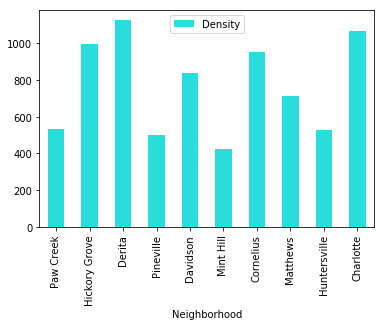

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
#mecklenburg_merged.hist(column='Density')
mecklenburg_merged.plot(kind='bar',x='Neighborhood',y='Density', color=rainbow[cluster])
plt.show()

# Let's Examine The Clusters

Once again, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster. I will leave this exercise to you.

### Cluster 1 - Pharmacy

In [76]:
mecklenburg_merged.loc[mecklenburg_merged['Cluster Labels'] == 0, mecklenburg_merged.columns[[1] + list(range(5, mecklenburg_merged.shape[1]))]]

,County,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7184,Mecklenburg,NC,0,Pharmacy,Donut Shop,Video Store,Supermarket,Ice Cream Shop,Scenic Lookout,Sandwich Place,Fried Chicken Joint,Chinese Restaurant,Women's Store


### Cluster 2 - Beer Garden and Bars

In [77]:
mecklenburg_merged.loc[mecklenburg_merged['Cluster Labels'] == 1, mecklenburg_merged.columns[[1] + list(range(5, mecklenburg_merged.shape[1]))]]

,County,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7182,Mecklenburg,NC,1,Chinese Restaurant,Discount Store,Pizza Place,Restaurant,Gas Station,Women's Store,Fried Chicken Joint,Dry Cleaner,Donut Shop,Diner
32556,Mecklenburg,NC,1,Beer Garden,Beer Bar,Pool Hall,Latin American Restaurant,Indian Restaurant,Deli / Bodega,Shoe Store,Pharmacy,Hobby Shop,Diner
32558,Mecklenburg,NC,1,Gym,Beer Bar,Restaurant,Sandwich Place,Shipping Store,Pizza Place,Bar,Discount Store,Diner,Camera Store
32559,Mecklenburg,NC,1,Ice Cream Shop,Women's Store,Gas Station,Fried Chicken Joint,Dry Cleaner,Donut Shop,Discount Store,Diner,Deli / Bodega,Cosmetics Shop
32560,Mecklenburg,NC,1,Gym,Pharmacy,Baseball Field,Big Box Store,Breakfast Spot,Construction & Landscaping,Dry Cleaner,Video Store,Martial Arts Dojo,American Restaurant
32561,Mecklenburg,NC,1,Pool,Kids Store,Brewery,Women's Store,Chinese Restaurant,Fried Chicken Joint,Dry Cleaner,Donut Shop,Discount Store,Diner
32562,Mecklenburg,NC,1,Bakery,Women's Store,Residential Building (Apartment / Condo),Convenience Store,Ice Cream Shop,Indian Restaurant,Camera Store,Men's Store,Mobile Phone Shop,Café


### Cluster 3 - Cosmetic Shops

In [78]:
mecklenburg_merged.loc[mecklenburg_merged['Cluster Labels'] == 2, mecklenburg_merged.columns[[1] + list(range(5, mecklenburg_merged.shape[1]))]]

,County,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32557,Mecklenburg,NC,2,Cosmetics Shop,Construction & Landscaping,Women's Store,Video Store,Furniture / Home Store,Fried Chicken Joint,Dry Cleaner,Donut Shop,Discount Store,Diner


### Cluster 4 - Tracks

In [79]:
mecklenburg_merged.loc[mecklenburg_merged['Cluster Labels'] == 3, mecklenburg_merged.columns[[1] + list(range(5, mecklenburg_merged.shape[1]))]]

,County,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7183,Mecklenburg,NC,3,Track,Basketball Court,Women's Store,Camera Store,Fried Chicken Joint,Dry Cleaner,Donut Shop,Discount Store,Diner,Deli / Bodega


In general, while all of these tools are useful, there is nothing like visiting the actual city, seeing the neighborhoods, and speaking with residents. If it's possible, an in-person visit is highly recommended before making a big move.